# Code Jam Pudding Notebook

 In this notebook, I will document the full workflow of our Code Jam project, from preprocessing and exploratory analysis to model training and evaluation. It also includes a prediction function and visualizations to interpret model performance and insights from the Spotify dataset.

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import joblib

In [237]:
df = pd.read_csv("SpotifyFeatures.csv", low_memory=False)

In [238]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


# Preprocessing & Results

In this section, I check the dataset for missing and duplicate values to ensure data quality. Cleaning these issues is a crucial first step before moving on to feature selection and modeling.

In [239]:
print("Missing values:", df.isnull().sum().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values: 1
Duplicate rows: 0


In [240]:
print("Duplicate track IDs:", df['track_id'].duplicated().sum())
df = df.drop_duplicates(subset='track_id')
df.info()

Duplicate track IDs: 55951
<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176774 non-null  object 
 1   artist_name       176774 non-null  object 
 2   track_name        176773 non-null  object 
 3   track_id          176774 non-null  object 
 4   popularity        176774 non-null  int64  
 5   acousticness      176774 non-null  float64
 6   danceability      176774 non-null  float64
 7   duration_ms       176774 non-null  int64  
 8   energy            176774 non-null  float64
 9   instrumentalness  176774 non-null  float64
 10  key               176774 non-null  object 
 11  liveness          176774 non-null  float64
 12  loudness          176774 non-null  float64
 13  mode              176774 non-null  object 
 14  speechiness       176774 non-null  float64
 15  tempo             176774 non-null  float64
 16

In [241]:
df['track_name'].isna().value_counts()

track_name
False    176773
True          1
Name: count, dtype: int64

In [242]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,176774.000000,176774.000000,176774.000000,1.767740e+05,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000
mean,36.273162,0.404135,0.541068,2.361272e+05,0.557025,0.172073,0.224531,-10.137605,0.127395,117.203679,0.451595
std,17.391016,0.366302,0.190387,1.305132e+05,0.275839,0.322936,0.211027,6.395551,0.204345,31.325091,0.267820
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,25.000000,0.045600,0.415000,1.782530e+05,0.344000,0.000000,0.097500,-12.851000,0.036800,92.006000,0.222000
50%,37.000000,0.288000,0.558000,2.194530e+05,0.592000,0.000070,0.130000,-8.191000,0.049400,115.006500,0.440000
75%,49.000000,0.791000,0.683000,2.685470e+05,0.789000,0.090800,0.277000,-5.631000,0.102000,138.799750,0.667000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [243]:
df[df['track_name'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176774 non-null  object 
 1   artist_name       176774 non-null  object 
 2   track_name        176773 non-null  object 
 3   track_id          176774 non-null  object 
 4   popularity        176774 non-null  int64  
 5   acousticness      176774 non-null  float64
 6   danceability      176774 non-null  float64
 7   duration_ms       176774 non-null  int64  
 8   energy            176774 non-null  float64
 9   instrumentalness  176774 non-null  float64
 10  key               176774 non-null  object 
 11  liveness          176774 non-null  float64
 12  loudness          176774 non-null  float64
 13  mode              176774 non-null  object 
 14  speechiness       176774 non-null  float64
 15  tempo             176774 non-null  float64
 16  time_signature    176774 

The dataset contains one missing track name, which is not meaningful for our analysis. Since track name does not correlate with popularity, we can safely ignore this missing value.

# Exploratory Data Analysis (EDA)

C:\Users\vikto\AppData\Local\Temp\ipykernel_137384\3272484459.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


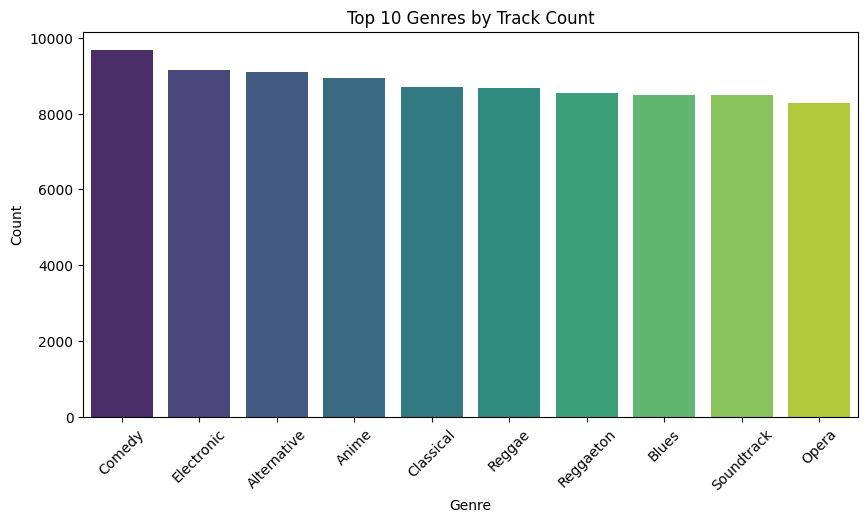

In [244]:
top_genres = df['genre'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Genres by Track Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

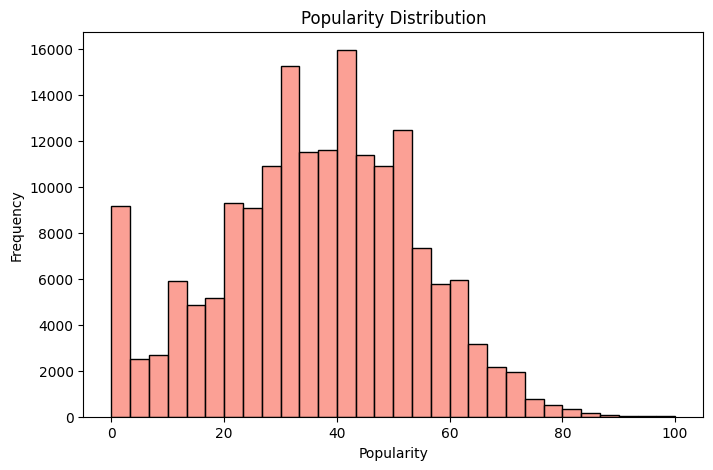

In [245]:
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=30, kde=False, color='salmon')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [246]:
use_cols = [
    'acousticness','danceability','duration_ms','energy','instrumentalness',
    'liveness','loudness','speechiness','tempo','valence','key','mode','time_signature']
df_fix = df[use_cols + ['popularity']].copy()

df_fix['time_signature'] = df_fix['time_signature'].astype(str).str.split('/').str[0]
if df_fix['mode'].dtype == 'O':
    df_fix['mode'] = df_fix['mode'].map({'Minor': 0, 'Major': 1})
df_fix = pd.get_dummies(df_fix, columns=['key'], prefix='key', drop_first=True)

y = df_fix['popularity'].values
X_df = df_fix.drop(columns=['popularity']).apply(pd.to_numeric, errors='coerce')
X_df = X_df.fillna(X_df.median(numeric_only=True))

genres = df.loc[X_df.index, 'genre']

X_train_df, X_test_df, y_train, y_test, genres_train, genres_test = train_test_split(X_df, y, genres, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df.values)
X_test  = scaler.transform(X_test_df.values)
print("Shapes:", X_train.shape, X_test.shape)

Shapes: (141419, 23) (35355, 23)


In [247]:
# Neural Network architecture
class SpotifyNet(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(SpotifyNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [248]:
model = SpotifyNet(input_dim=X_train.shape[1], hidden_dim=64)

In [ ]:
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_pred = model(X_test_tensor)

    y_pred = y_pred.numpy().flatten()
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Neural Net RMSE:", nn_rmse)

Neural Net RMSE: 40.40866678773874


In [250]:
# Baseline: predict mean popularity
mean_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(((mean_pred - y_test) ** 2).mean())
print("Baseline RMSE:", baseline_rmse)
print("NN RMSE:", nn_rmse)

Baseline RMSE: 17.418086367654553
NN RMSE: 40.40866678773874


Per-genre RMSE:
 genre
Children's Music     8.912174
A Capella           11.029453
Opera               15.906310
Movie               17.353753
Comedy              23.101093
Anime               26.063044
Ska                 29.797477
Classical           32.678317
Soundtrack          34.850971
Blues               35.238230
dtype: float64


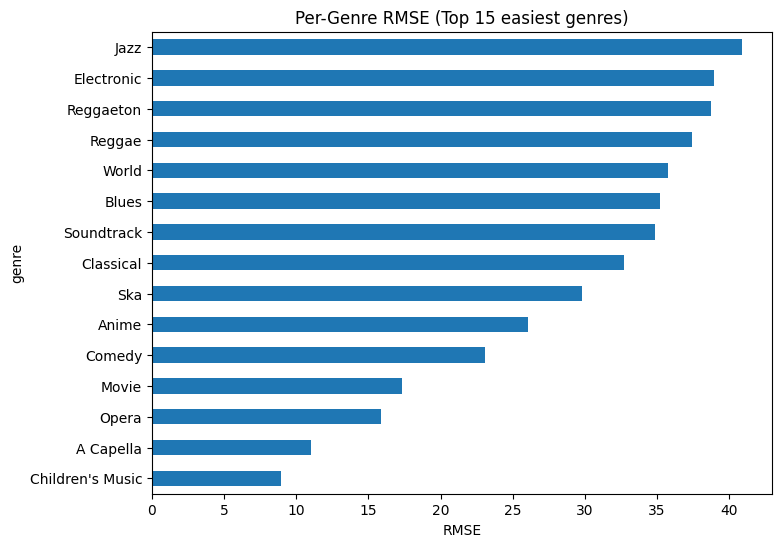

In [257]:
test_df = pd.DataFrame({"genre": genres_test.values,"predicted": y_pred,"actual": y_test})

genre_errors = (test_df.groupby("genre")[["predicted", "actual"]].apply(lambda g: np.sqrt(((g["predicted"] - g["actual"])**2).mean())).sort_values())
print("Per-genre RMSE:\n", genre_errors.head(10))

genre_errors.head(15).plot(kind="barh", figsize=(8,6))
plt.xlabel("RMSE")
plt.title("Per-Genre RMSE (Top 15 easiest genres)")
plt.show()

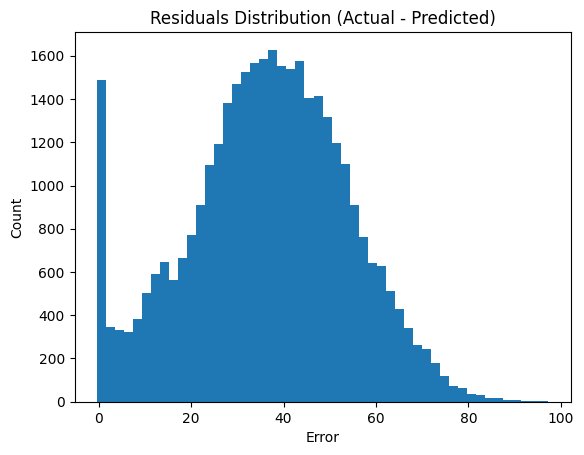

In [252]:
residuals = y_test - y_pred

plt.hist(residuals, bins=50)
plt.title("Residuals Distribution (Actual - Predicted)")
plt.xlabel("Error")
plt.ylabel("Count")
plt.show()

In [253]:
def predict_popularity(new_song_features, model, scaler):
    """
    new_song_features: 1D array or list with same order of features as X
    model: trained PyTorch model
    scaler: fitted StandardScaler
    """
    scaled = scaler.transform([new_song_features])
    tensor = torch.tensor(scaled, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        pred = model(tensor).item()
    return pred

example_raw = X_test_df.iloc[0].values
prediction = predict_popularity(example_raw, model, scaler)
prediction = float(np.clip(prediction, 0, 100))
print("Predicted popularity:", prediction)

Predicted popularity: 0.21643704175949097
